In [9]:
import numpy as np

from matplotlib import pyplot as plt
from citk.layer import Dense, Fuzzify
from citk.model import FFN, GMDH
from citk.functions import ReLU, Linear, BellMembership, GaussianMembership, Sum
from citk.losses import MSE
from citk.optimisers import GeneticAlgorithmOptimizer, SGDOptimizer, ConjugateSGDOptimizer

from utils import get_and_process_boston_dataset,\
                        visualise_boston, \
                    seed_everything, \
                    get_and_process_load_diabetes, \
                    create_lags , normalize_df


%matplotlib inline

import pandas as pd
from tqdm import tqdm

# Tuning models and split dataset on the batchs

In [52]:
RANDOM_SEED = 42

# weight_list = pd.read_csv('weight/list_weigh.csv').iloc[:,1:]

seed_everything(RANDOM_SEED)

test_size = 0.5

X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []

data = pd.read_csv('data/data.csv', encoding='cp1251', sep=';', decimal=',').dropna()


for i in range(10):

    INITIAL_TEST_LEN = int(data.shape[0] * test_size) + 1
    
    train_df, test_df = data.iloc[:-INITIAL_TEST_LEN ], data.iloc[-INITIAL_TEST_LEN :]
    
    train_df, test_df = create_lags(
        train_df, test_df, 
        train_df.columns.tolist(), 
        N_LAGS
    )
    
    y_col = 'ІСЦ (+1)'
    X_col = train_df.columns.tolist()
    X_col.remove(y_col)

    train_df, test_df = normalize_df(train_df, test_df, X_col)

    X_train = train_df.loc[:, X_col].values
    X_test = test_df.loc[:, X_col].values
    y_train = train_df.loc[:, y_col].values[..., np.newaxis]
    y_test = test_df.loc[:, y_col].values[..., np.newaxis]
    

    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)
    
    print(f"INITIAL_TEST_LEN:\t{INITIAL_TEST_LEN}")
    print(f"test_size = {test_size}")
    print(f"X_train shape = {X_train.shape}")
    print(f"X_test shape = {X_test.shape}")

    #visualise_boston(X_train, X_test, y_train, y_test)

    test_size = test_size - 0.04

/home/eduard/gitRepo/Neural_Net_Genetic_Alg/utils.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[f'{col}_{sh}'] = train_df.shift(sh)[col]
/home/eduard/gitRepo/Neural_Net_Genetic_Alg/utils.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[f'{col}_{sh}'] = test_df.shift(sh)[col]
/home/eduard/gitRepo/Neural_Net_Genetic_Alg/utils.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


INITIAL_TEST_LEN:	20
test_size = 0.5
X_train shape = (17, 44)
X_test shape = (18, 44)
INITIAL_TEST_LEN:	18
test_size = 0.46
X_train shape = (19, 44)
X_test shape = (16, 44)
INITIAL_TEST_LEN:	17
test_size = 0.42000000000000004
X_train shape = (20, 44)
X_test shape = (15, 44)


/home/eduard/gitRepo/Neural_Net_Genetic_Alg/utils.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[f'{col}_{sh}'] = train_df.shift(sh)[col]
/home/eduard/gitRepo/Neural_Net_Genetic_Alg/utils.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[f'{col}_{sh}'] = test_df.shift(sh)[col]
/home/eduard/gitRepo/Neural_Net_Genetic_Alg/utils.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


INITIAL_TEST_LEN:	15
test_size = 0.38000000000000006
X_train shape = (22, 44)
X_test shape = (13, 44)
INITIAL_TEST_LEN:	14
test_size = 0.3400000000000001
X_train shape = (23, 44)
X_test shape = (12, 44)
INITIAL_TEST_LEN:	12
test_size = 0.3000000000000001
X_train shape = (25, 44)
X_test shape = (10, 44)


/home/eduard/gitRepo/Neural_Net_Genetic_Alg/utils.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[f'{col}_{sh}'] = train_df.shift(sh)[col]
/home/eduard/gitRepo/Neural_Net_Genetic_Alg/utils.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[f'{col}_{sh}'] = test_df.shift(sh)[col]
/home/eduard/gitRepo/Neural_Net_Genetic_Alg/utils.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


INITIAL_TEST_LEN:	11
test_size = 0.2600000000000001
X_train shape = (26, 44)
X_test shape = (9, 44)
INITIAL_TEST_LEN:	9
test_size = 0.2200000000000001
X_train shape = (28, 44)
X_test shape = (7, 44)
INITIAL_TEST_LEN:	8
test_size = 0.1800000000000001
X_train shape = (29, 44)
X_test shape = (6, 44)
INITIAL_TEST_LEN:	6
test_size = 0.1400000000000001
X_train shape = (31, 44)
X_test shape = (4, 44)


/home/eduard/gitRepo/Neural_Net_Genetic_Alg/utils.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[f'{col}_{sh}'] = train_df.shift(sh)[col]
/home/eduard/gitRepo/Neural_Net_Genetic_Alg/utils.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[f'{col}_{sh}'] = test_df.shift(sh)[col]


In [10]:
RANDOM_SEED = 42
N_LAGS = 2
INITIAL_TEST_LEN = 8

seed_everything(RANDOM_SEED)

data = pd.read_csv('data/data.csv', encoding='cp1251', sep=';', decimal=',').dropna()

train_df, test_df = data.iloc[:-INITIAL_TEST_LEN], data.iloc[-INITIAL_TEST_LEN:]

train_df, test_df = create_lags(
    train_df, test_df, 
    train_df.columns.tolist(), 
    N_LAGS
)

y_col = 'ІСЦ (+1)'
X_col = train_df.columns.tolist()
X_col.remove(y_col)

train_df, test_df = normalize_df(train_df, test_df, X_col)

X_train = train_df[X_col].values
X_test = test_df[X_col].values
y_train = train_df[y_col].values[..., np.newaxis]
y_test = test_df[y_col].values[..., np.newaxis]

  0%|          | 0/10 [00:00<?, ?it/s]

####################
X_train shape = (17, 44)


Training :   0%|          | 0/100 [00:00<?, ?it/s]

One fit:   0%|          | 0/946 [00:00<?, ?it/s]

/home/eduard/anaconda3/envs/ml_coursera/lib/python3.7/site-packages/scipy/optimize/_linprog.py:512: OptimizeWarning: x0 is used only when method is 'revised simplex'. 
  warn(warning_message, OptimizeWarning)


Layer: 0. Metric: 2.010496739040569


One fit:   0%|          | 0/21 [00:00<?, ?it/s]

Layer: 1. Metric: 1.5682981612725901


One fit:   0%|          | 0/21 [00:00<?, ?it/s]

Layer: 2. Metric: 1.559498898253513


One fit:   0%|          | 0/21 [00:00<?, ?it/s]

Layer: 3. Metric: 1.4989937118745902


One fit:   0%|          | 0/21 [00:00<?, ?it/s]

Layer: 4. Metric: 1.5609438362302597
Test MSE: 1.4989937118745902
Train MSE: 1.810400813518771


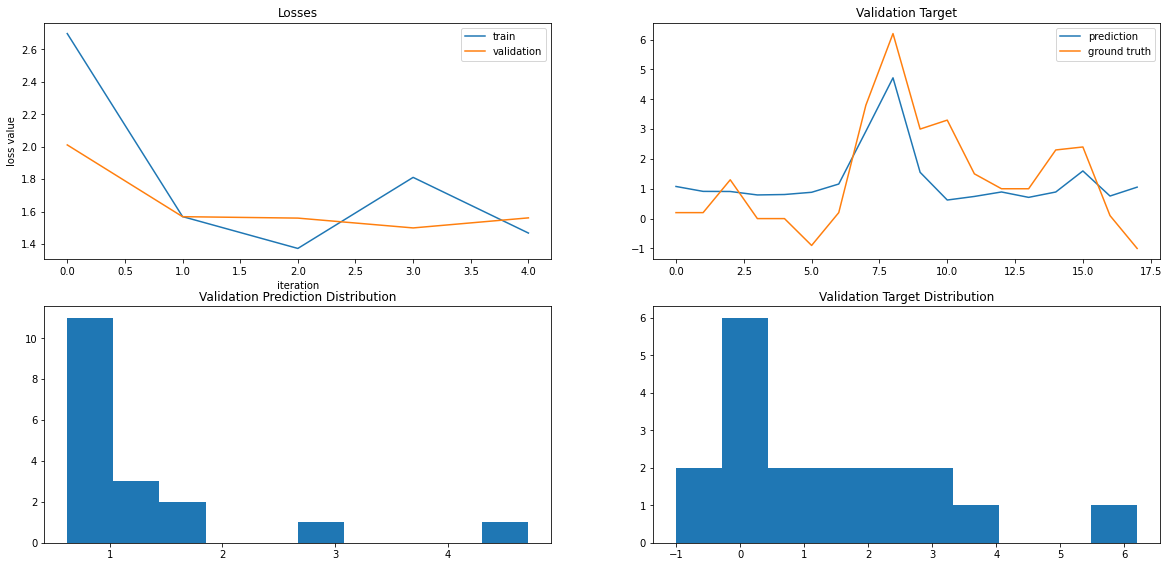

 10%|█         | 1/10 [00:08<01:17,  8.61s/it]

####################
X_train shape = (19, 44)


Training :   0%|          | 0/100 [00:00<?, ?it/s]

One fit:   0%|          | 0/946 [00:00<?, ?it/s]

/home/eduard/anaconda3/envs/ml_coursera/lib/python3.7/site-packages/scipy/optimize/_linprog.py:512: OptimizeWarning: x0 is used only when method is 'revised simplex'. 
  warn(warning_message, OptimizeWarning)


Layer: 0. Metric: 2.4510631201329227


One fit:   0%|          | 0/21 [00:00<?, ?it/s]

Layer: 1. Metric: 2.267205379395958


One fit:   0%|          | 0/21 [00:00<?, ?it/s]

Layer: 2. Metric: 2.847383502879692
Test MSE: 2.267205379395958
Train MSE: 1.733316173153643


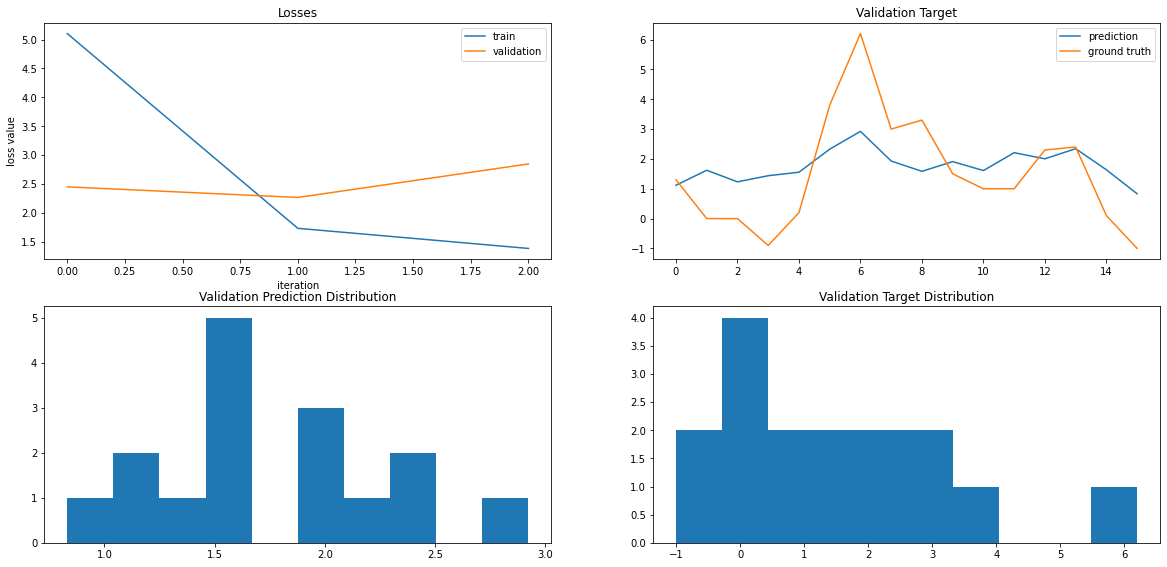

 20%|██        | 2/10 [00:20<01:24, 10.56s/it]

####################
X_train shape = (20, 44)


Training :   0%|          | 0/100 [00:00<?, ?it/s]

One fit:   0%|          | 0/946 [00:00<?, ?it/s]

/home/eduard/anaconda3/envs/ml_coursera/lib/python3.7/site-packages/scipy/optimize/_linprog.py:512: OptimizeWarning: x0 is used only when method is 'revised simplex'. 
  warn(warning_message, OptimizeWarning)


Layer: 0. Metric: 2.661235867636603


One fit:   0%|          | 0/21 [00:00<?, ?it/s]

Layer: 1. Metric: 2.1156769787548764


One fit:   0%|          | 0/21 [00:00<?, ?it/s]

Layer: 2. Metric: 2.0630655201417336


One fit:   0%|          | 0/21 [00:00<?, ?it/s]

Layer: 3. Metric: 2.0554063231074067


One fit:   0%|          | 0/21 [00:00<?, ?it/s]

Layer: 4. Metric: 2.082223758091258
Test MSE: 2.0554063231074067
Train MSE: 1.201853153495104


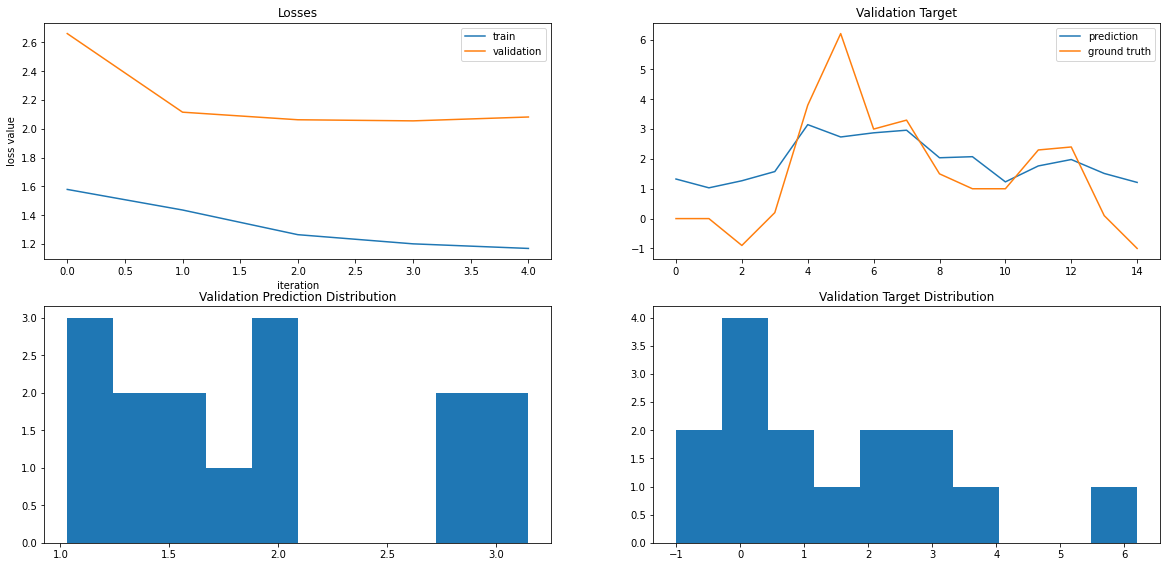

 30%|███       | 3/10 [00:32<01:19, 11.35s/it]

####################
X_train shape = (22, 44)


Training :   0%|          | 0/100 [00:00<?, ?it/s]

One fit:   0%|          | 0/946 [00:00<?, ?it/s]

/home/eduard/anaconda3/envs/ml_coursera/lib/python3.7/site-packages/scipy/optimize/_linprog.py:512: OptimizeWarning: x0 is used only when method is 'revised simplex'. 
  warn(warning_message, OptimizeWarning)
/home/eduard/gitRepo/Neural_Net_Genetic_Alg/citk/utils.py:101: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  obj_w, ineq_A, ineq_y, bounds=bounds, method="interior-point", x0=initial_x
/home/eduard/gitRepo/Neural_Net_Genetic_Alg/citk/utils.py:101: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
  obj_w, ineq_A, ineq_y, bounds=bounds, method="interior-point", x0=initial_x
/home/eduard/gitRepo/Neural_Net_Gen

Layer: 0. Metric: 2.2362576596629333


One fit:   0%|          | 0/21 [00:00<?, ?it/s]

/home/eduard/anaconda3/envs/ml_coursera/lib/python3.7/site-packages/scipy/optimize/_linprog_ip.py:116: LinAlgWarning: Ill-conditioned matrix (rcond=1.31813e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
/home/eduard/anaconda3/envs/ml_coursera/lib/python3.7/site-packages/scipy/optimize/_linprog_ip.py:116: LinAlgWarning: Ill-conditioned matrix (rcond=5.63829e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)


Layer: 1. Metric: 2.0288419846080923


One fit:   0%|          | 0/21 [00:00<?, ?it/s]

Layer: 2. Metric: 2.1839452201431504
Test MSE: 2.0288419846080923
Train MSE: 1.9785915803369916


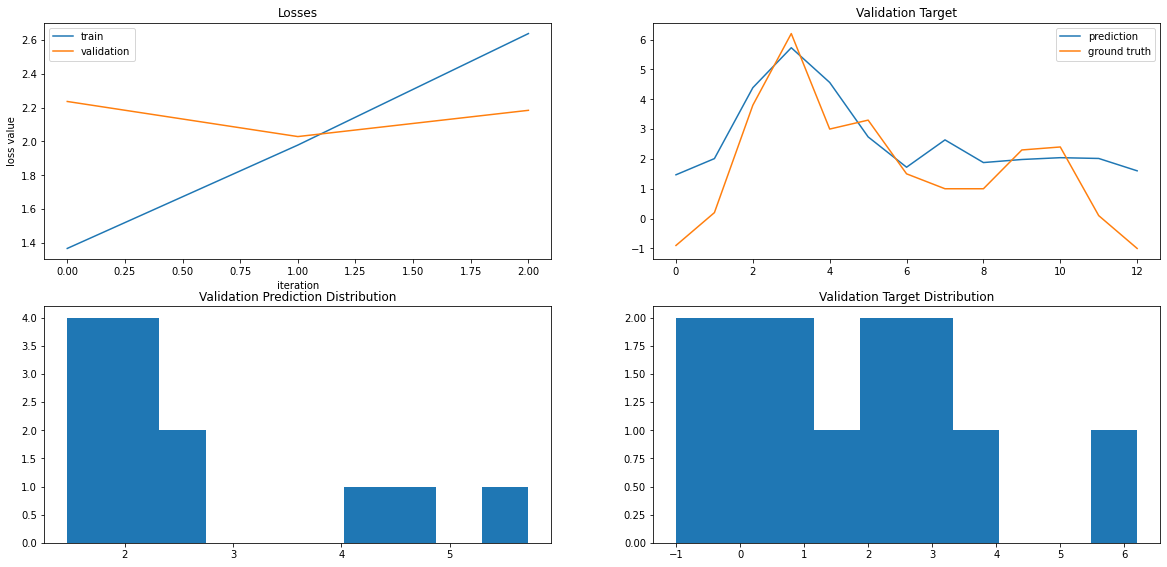

 40%|████      | 4/10 [00:45<01:10, 11.70s/it]

####################
X_train shape = (23, 44)


Training :   0%|          | 0/100 [00:00<?, ?it/s]

One fit:   0%|          | 0/946 [00:00<?, ?it/s]

/home/eduard/anaconda3/envs/ml_coursera/lib/python3.7/site-packages/scipy/optimize/_linprog.py:512: OptimizeWarning: x0 is used only when method is 'revised simplex'. 
  warn(warning_message, OptimizeWarning)
/home/eduard/gitRepo/Neural_Net_Genetic_Alg/citk/utils.py:101: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  obj_w, ineq_A, ineq_y, bounds=bounds, method="interior-point", x0=initial_x
/home/eduard/gitRepo/Neural_Net_Genetic_Alg/citk/utils.py:101: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
  obj_w, ineq_A, ineq_y, bounds=bounds, method="interior-point", x0=initial_x
/home/eduard/anaconda3/envs/ml_cour

Layer: 0. Metric: 1.629824235462842


One fit:   0%|          | 0/21 [00:00<?, ?it/s]

Layer: 1. Metric: 1.2600733958394914


One fit:   0%|          | 0/21 [00:00<?, ?it/s]

Layer: 2. Metric: 1.1365400032494293


One fit:   0%|          | 0/21 [00:00<?, ?it/s]

Layer: 3. Metric: 1.1785430288491336
Test MSE: 1.1365400032494293
Train MSE: 1.4432526930636815


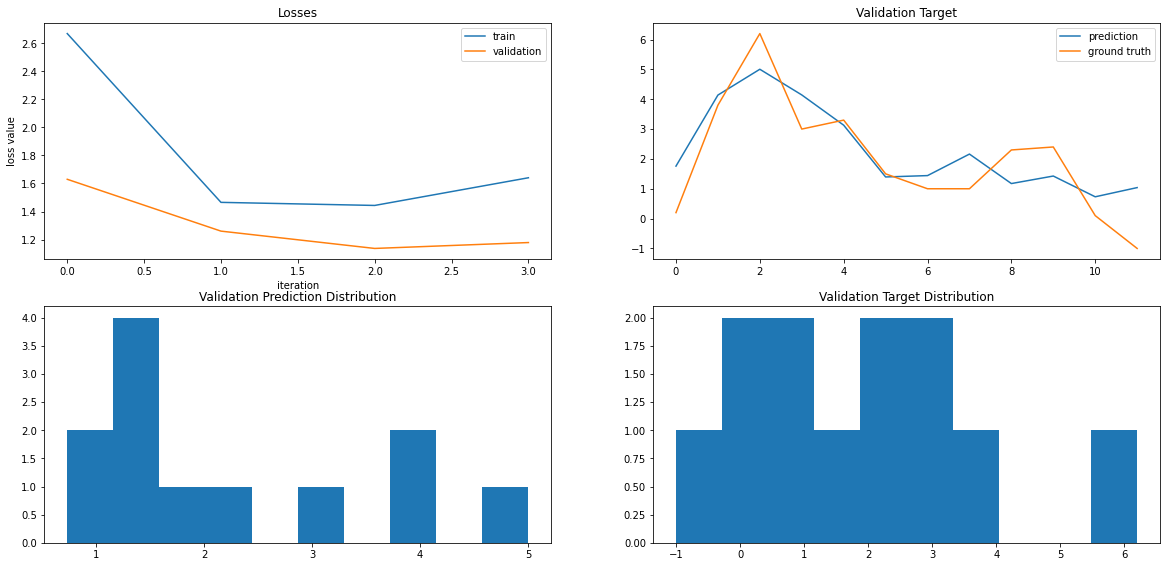

 50%|█████     | 5/10 [00:57<01:00, 12.04s/it]

####################
X_train shape = (25, 44)


Training :   0%|          | 0/100 [00:00<?, ?it/s]

One fit:   0%|          | 0/946 [00:00<?, ?it/s]

/home/eduard/anaconda3/envs/ml_coursera/lib/python3.7/site-packages/scipy/optimize/_linprog.py:512: OptimizeWarning: x0 is used only when method is 'revised simplex'. 
  warn(warning_message, OptimizeWarning)


Layer: 0. Metric: 1.9799703308184995


One fit:   0%|          | 0/21 [00:00<?, ?it/s]

Layer: 1. Metric: 1.0982283422041765


One fit:   0%|          | 0/21 [00:00<?, ?it/s]

Layer: 2. Metric: 1.3414777542720686
Test MSE: 1.0982283422041765
Train MSE: 1.2146051876691641


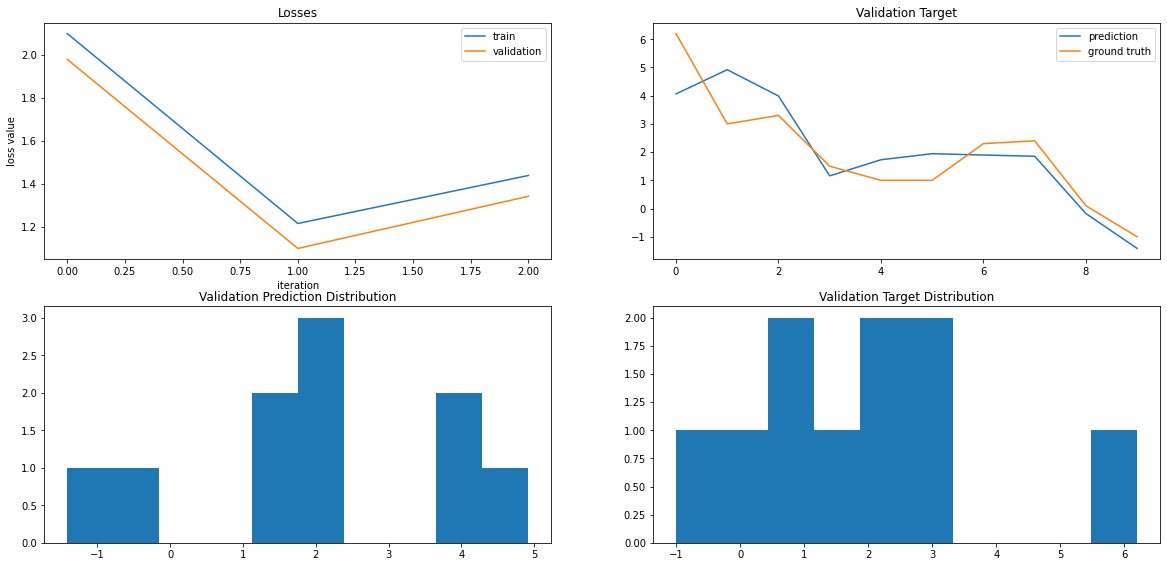

 60%|██████    | 6/10 [01:10<00:49, 12.38s/it]

####################
X_train shape = (26, 44)


Training :   0%|          | 0/100 [00:00<?, ?it/s]

One fit:   0%|          | 0/946 [00:00<?, ?it/s]

/home/eduard/anaconda3/envs/ml_coursera/lib/python3.7/site-packages/scipy/optimize/_linprog.py:512: OptimizeWarning: x0 is used only when method is 'revised simplex'. 
  warn(warning_message, OptimizeWarning)


Layer: 0. Metric: 0.9937383243903373


One fit:   0%|          | 0/21 [00:00<?, ?it/s]

Layer: 1. Metric: 0.7801714034943498


One fit:   0%|          | 0/21 [00:00<?, ?it/s]

Layer: 2. Metric: 1.1782982453794615
Test MSE: 0.7801714034943498
Train MSE: 3.437672072451453


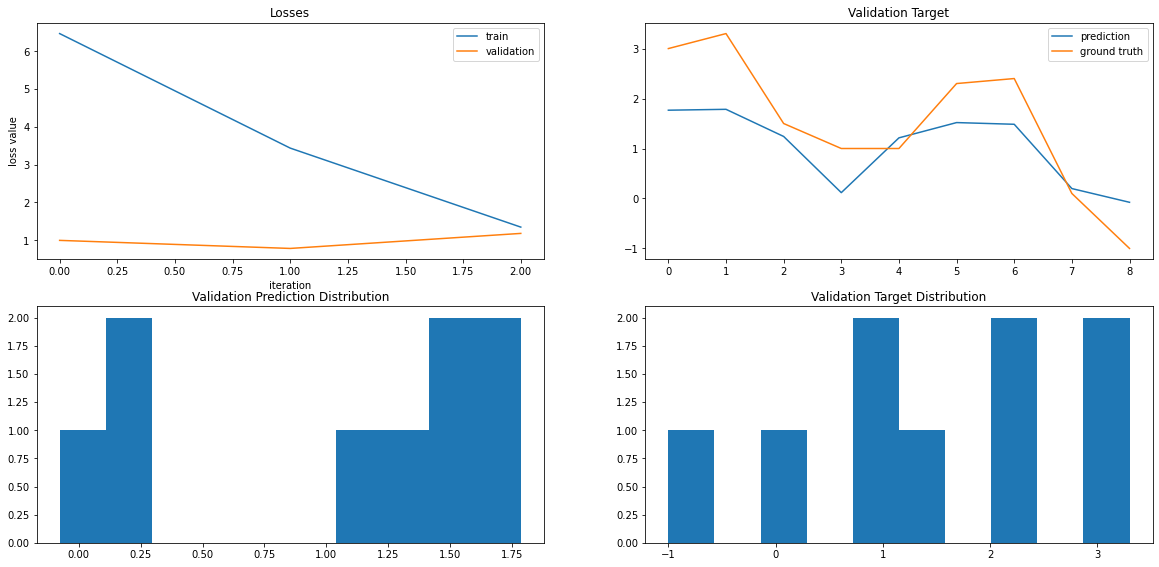

 70%|███████   | 7/10 [01:24<00:38, 12.85s/it]

####################
X_train shape = (28, 44)


Training :   0%|          | 0/100 [00:00<?, ?it/s]

One fit:   0%|          | 0/946 [00:00<?, ?it/s]

/home/eduard/anaconda3/envs/ml_coursera/lib/python3.7/site-packages/scipy/optimize/_linprog.py:512: OptimizeWarning: x0 is used only when method is 'revised simplex'. 
  warn(warning_message, OptimizeWarning)
/home/eduard/gitRepo/Neural_Net_Genetic_Alg/citk/utils.py:101: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  obj_w, ineq_A, ineq_y, bounds=bounds, method="interior-point", x0=initial_x
/home/eduard/gitRepo/Neural_Net_Genetic_Alg/citk/utils.py:101: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
  obj_w, ineq_A, ineq_y, bounds=bounds, method="interior-point", x0=initial_x
/home/eduard/anaconda3/envs/ml_cour

Layer: 0. Metric: 0.31362446260075794


One fit:   0%|          | 0/21 [00:00<?, ?it/s]

Layer: 1. Metric: 0.3042297297400044


One fit:   0%|          | 0/21 [00:00<?, ?it/s]

Layer: 2. Metric: 0.08659317158475108


One fit:   0%|          | 0/21 [00:00<?, ?it/s]

Layer: 3. Metric: 0.11173210052848721
Test MSE: 0.08659317158475108
Train MSE: 1.9188200436135323


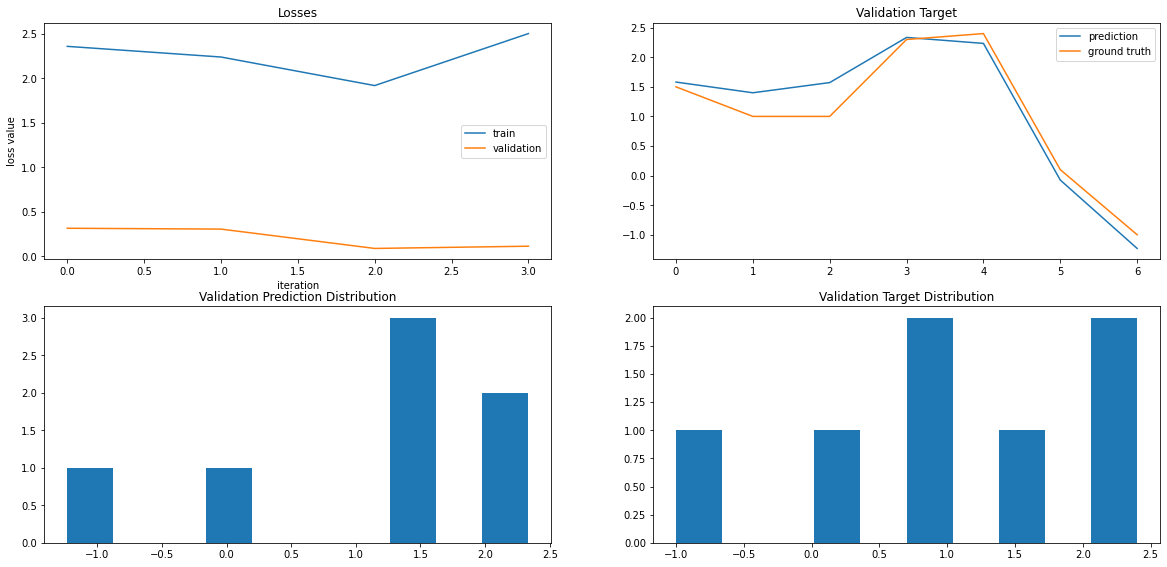

 80%|████████  | 8/10 [01:38<00:26, 13.06s/it]

####################
X_train shape = (29, 44)


Training :   0%|          | 0/100 [00:00<?, ?it/s]

One fit:   0%|          | 0/946 [00:00<?, ?it/s]

/home/eduard/anaconda3/envs/ml_coursera/lib/python3.7/site-packages/scipy/optimize/_linprog.py:512: OptimizeWarning: x0 is used only when method is 'revised simplex'. 
  warn(warning_message, OptimizeWarning)


Layer: 0. Metric: 0.48559911624751656


One fit:   0%|          | 0/21 [00:00<?, ?it/s]

Layer: 1. Metric: 0.7591901361821348
Test MSE: 0.48559911624751656
Train MSE: 1.701612879263554


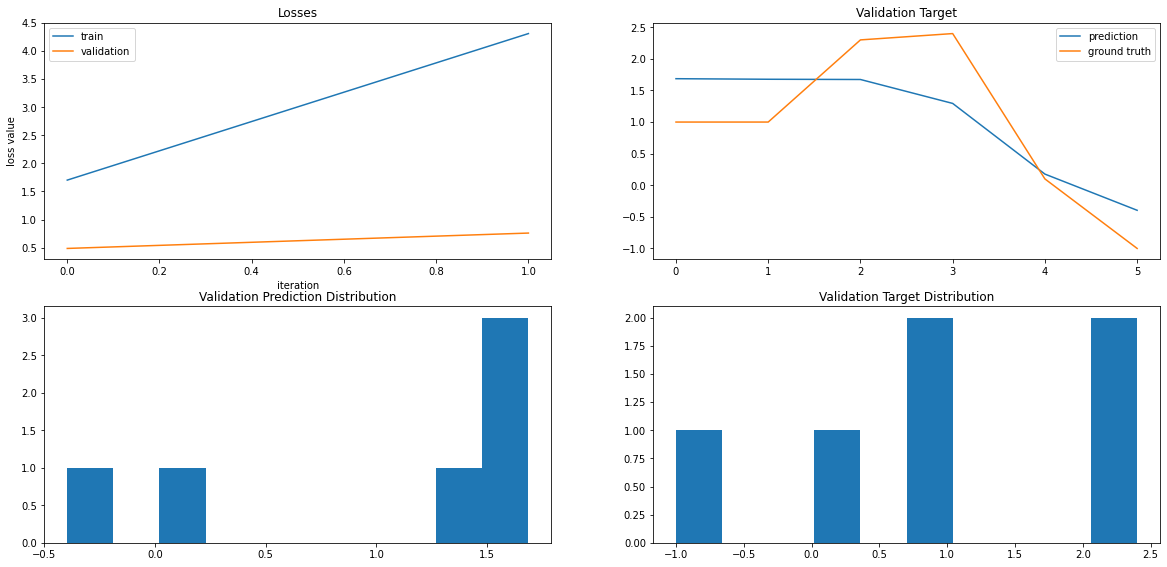

 90%|█████████ | 9/10 [01:51<00:13, 13.12s/it]

####################
X_train shape = (31, 44)


Training :   0%|          | 0/100 [00:00<?, ?it/s]

One fit:   0%|          | 0/946 [00:00<?, ?it/s]

/home/eduard/anaconda3/envs/ml_coursera/lib/python3.7/site-packages/scipy/optimize/_linprog.py:512: OptimizeWarning: x0 is used only when method is 'revised simplex'. 
  warn(warning_message, OptimizeWarning)
/home/eduard/gitRepo/Neural_Net_Genetic_Alg/citk/utils.py:101: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  obj_w, ineq_A, ineq_y, bounds=bounds, method="interior-point", x0=initial_x
/home/eduard/gitRepo/Neural_Net_Genetic_Alg/citk/utils.py:101: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
  obj_w, ineq_A, ineq_y, bounds=bounds, method="interior-point", x0=initial_x
/home/eduard/anaconda3/envs/ml_cour

Layer: 0. Metric: 0.19807739676653258


One fit:   0%|          | 0/21 [00:00<?, ?it/s]

Layer: 1. Metric: 0.05745770102526642


One fit:   0%|          | 0/21 [00:00<?, ?it/s]

Layer: 2. Metric: 0.3914757596826398
Test MSE: 0.05745770102526642
Train MSE: 3.1805826571351647


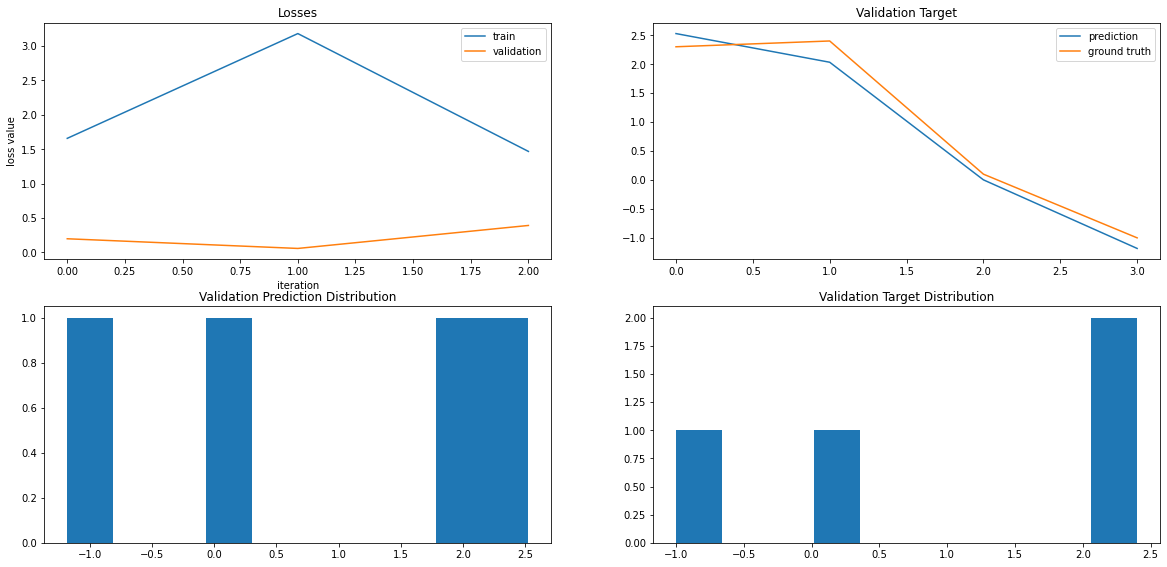

100%|██████████| 10/10 [02:20<00:00, 14.08s/it]


In [55]:
Test_MSE_list = []
Train_MSE_list = []
list_weigh = []
n_best_to_take = 7 # 5,6,7

directory = f'lab8_{n_best_to_take}/' # change directory

for i in tqdm(range(10)):
    print("####################")

    print(f"X_train shape = {X_train_list[i].shape}")

    X_train = X_train_list[i]
    y_train = y_train_list[i]
    y_test = y_test_list[i]
    X_test = X_test_list[i]
    
    model = GMDH(
            method_type='fuzzy', 
            poli_type='partial_quadratic',
            loss=MSE, 
            confidence=0.9
        )
    
    trained, history  = model.fit(
                    (X_train, y_train),
                    (X_test, y_test),
                    max_gmdh_layers=100,
                    n_best_to_take=n_best_to_take,
                    verbose=True)
    

    list_weigh.append(model.W_vect)

    df_weight_list = pd.DataFrame(list_weigh)
    df_weight_list.to_csv(f"{directory}/weigth_list.csv", index=False)
    plt.figure(figsize=(20,20))

    plt.subplot(421)
    plt.title('Losses')
    plt.plot(history['train_loss'], label='train')
    plt.plot(history['validation_loss'], label='validation')
    plt.xlabel('iteration')
    plt.ylabel('loss value')
    plt.legend()


    prediction = trained.predict(X_test)
    prediction_train = trained.predict(X_train)

    with open(f'{directory}test_{i}_weigh.npy', 'wb') as f1, open(f'{directory}test_{i}_MSE.npy', 'wb') as f:
        np.save(f1, np.array(model.W_vect))
        np.save(f, np.array([MSE(y_test, prediction)[0], MSE(y_train, prediction_train)[0]]))

    print(f"Test MSE: {MSE(y_test, prediction)[0]}")
    print(f"Train MSE: {MSE(y_train, prediction_train)[0]}")

    Test_MSE_list.append(MSE(y_test, prediction)[0])
    Train_MSE_list.append(MSE(y_train, prediction_train)[0])

    pd_Train_MSE_list = pd.DataFrame({
        'Train_MSE': Train_MSE_list,
        'Test_MSE' : Test_MSE_list
    })

    pd_Train_MSE_list.to_csv(f'{directory}test_train_metrics.csv', index=False)
    plt.subplot(422)
    plt.title('Validation Target')
    plt.plot(prediction, label='prediction')
    plt.plot(y_test, label='ground truth')
    plt.legend()


    plt.subplot(423)
    plt.title('Validation Prediction Distribution')
    plt.hist(prediction)


    plt.subplot(424)
    plt.title('Validation Target Distribution')
    plt.hist(y_test)
    plt.savefig(f"{directory}iter_{i}.png")
    plt.show()